In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv',parse_dates=['report_date'])

C:\Program Files\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.isnull().sum()

report_date              0
location                 7
location_type            7
data_field               7
data_field_code          7
time_period         107619
time_period_type    107619
value                  138
unit                     7
dtype: int64

### therefore time_period and time_period_type are completely null. Hence drop

In [4]:
data.drop(['time_period','time_period_type'],axis=1,inplace=True)
data.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [5]:
data.data_field_code.nunique()  # cannot be made index  
# also nothing to rename

153

### Clean Data by analysing missing values

In [6]:
data.dropna(how='all').shape
# therefore there is no Row where all data is empty 
#hence cannot drop a complete row

(107619, 7)

In [7]:
data[data.location.isnull()]
#there are 7 rows where all columns expect 1 is NaN. 

,report_date,location,location_type,data_field,data_field_code,value,unit
93193,nan,NaN,NaN,NaN,NaN,NaN,NaN
104239,nan,NaN,NaN,NaN,NaN,NaN,NaN
104240,nan,NaN,NaN,NaN,NaN,NaN,NaN
104241,nan,NaN,NaN,NaN,NaN,NaN,NaN
104246,nan,NaN,NaN,NaN,NaN,NaN,NaN
104247,nan,NaN,NaN,NaN,NaN,NaN,NaN
104248,nan,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.dropna(subset=['location', 'location_type', 'data_field','data_field_code', 'value', 'unit'],how='all').shape
# only 7 rows will be lost, if we delete the data .
#Hence, we can follow

(107612, 7)

## Drop 7 Rows

In [9]:
data.dropna(subset=['location', 'location_type', 'data_field','data_field_code', 'value', 'unit'],how='all',inplace=True)

In [10]:
data.isnull().sum()

report_date          0
location             0
location_type        0
data_field           0
data_field_code      0
value              131
unit                 0
dtype: int64

## Treat 'Value' column ( which has 131 NaN values)

##### convert into numeric and skip value like 125*2

In [11]:
data['value']=pd.to_numeric(data.value,errors='coerce')
data.value.describe()

count    107478.000000
mean         48.634548
std        1343.204370
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      161241.000000
Name: value, dtype: float64

#### replace missing value with the mean of column

In [12]:
data.value.fillna(data.value.mean(), inplace = True)
data.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

# 1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [13]:
data[(data.data_field_code=='AR0005') &(data.location=='Argentina-Catamarca') ]['value']

16      14.0
160     15.0
304     15.0
448     15.0
592     15.0
736     15.0
880     16.0
1024    15.0
1168    16.0
1312    15.0
1456    15.0
1600    15.0
1744    15.0
1888    16.0
Name: value, dtype: float64

## Mid-Analysis before Question 2

In [14]:
data[data['report_date'] == '2016_02_04']
# report_date need to be converted into Datetime but, some values have other format

,report_date,location,location_type,data_field,data_field_code,value,unit
104407,2016_02_04,Puerto_Rico,territory,zika_confirmed_4weeks,PR0001,15.0,cases
104408,2016_02_04,Puerto_Rico,territory,zika_confirmed_cumulative_2016,PR0003,12.0,cases
104409,2016_02_04,Puerto_Rico,territory,flavi_confirmed_cumulative_2016,PR0005,0.0,cases
104410,2016_02_04,Puerto_Rico,territory,zika_confirmed_cumulative_2015-2016,PR0006,21.0,cases
104411,2016_02_04,Puerto_Rico,territory,zika_confirmed_pregnant_cumulative_2015-2016,PR0007,1.0,cases
104412,2016_02_04,Puerto_Rico,territory,zika_confirmed_pregnant_symptomatic_cumulative...,PR0008,0.0,cases
104413,2016_02_04,Puerto_Rico,territory,zika_confirmed_pregnant_asymptomatic_cumulativ...,PR0009,0.0,cases
104414,2016_02_04,Puerto_Rico,territory,GBS_reported_cumulative_2015-2016,PR0010,0.0,cases
104415,2016_02_04,Puerto_Rico,territory,arbovirus_suspected_2weeks,PR0011,240.0,cases
104416,2016_02_04,Puerto_Rico,territory,arbovirus_suspected_cumulative_2016,PR0012,184.0,cases


### Replace _ with - to make date format string

In [15]:
data.report_date=data.report_date.str.replace('_','-')

## Convert date string to DateTime

In [16]:
data['report_date'] = pd.to_datetime(data['report_date'])



# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

Text(0.5,1,'Value distribution')

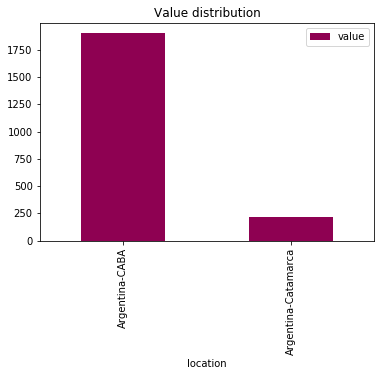

In [28]:
ACabaCata=data[((data.location=="Argentina-CABA")&(data.unit=="cases"))|((data.location=="Argentina-Catamarca")&(data.unit=="cases"))]
ACabaCata.groupby('location').sum().plot(kind='bar',colormap='PiYG')
plt.title("Value distribution")


# Structuring before Question 3

In [29]:
Argentina_CABA=data[(data.location=="Argentina-CABA")&(data.unit=="cases")]
Argentina_Catamarca=data[(data.location=="Argentina-Catamarca")&(data.unit=="cases")]

In [13]:
Argentina_CABA.data_field.value_counts()==Argentina_Catamarca.data_field.value_counts()
# From observation Both CABA and Catarmarca have same/common data_field column values

cumulative_cases_under_study           True
cumulative_cases_discarded             True
cumulative_probable_local_cases        True
cumulative_probable_imported_cases     True
cumulative_confirmed_imported_cases    True
cumulative_confirmed_local_cases       True
Name: data_field, dtype: bool

In [31]:
dataframe =Argentina_CABA.filter(['value','data_field'],axis=1)
dataframe['Catamarca']=Argentina_Catamarca['value'].values
dataframe.rename(columns={'value':'Caba'},inplace=True)
dataframe['Buenos_Aires']=data[data.location=='Argentina-Buenos_Aires']['value'].values
dataframe.head()

,Caba,data_field,Catamarca,Buenos_Aires
6,0.0,cumulative_confirmed_local_cases,0.0,0.0
7,0.0,cumulative_probable_local_cases,0.0,0.0
8,9.0,cumulative_confirmed_imported_cases,0.0,2.0
9,0.0,cumulative_probable_imported_cases,0.0,1.0
10,68.0,cumulative_cases_under_study,14.0,127.0


# 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [39]:
dataframe.groupby('data_field').sum()

,Caba,month,Catamarca,Buenos_Aires
data_field,,,,
cumulative_cases_discarded,27.0,66,0.0,251.0
cumulative_cases_under_study,1748.0,66,212.0,2981.0
cumulative_confirmed_imported_cases,124.0,66,0.0,32.0
cumulative_confirmed_local_cases,0.0,66,0.0,0.0
cumulative_probable_imported_cases,0.0,66,0.0,15.0
cumulative_probable_local_cases,0.0,66,0.0,0.0


### Could be visualize as bar graph

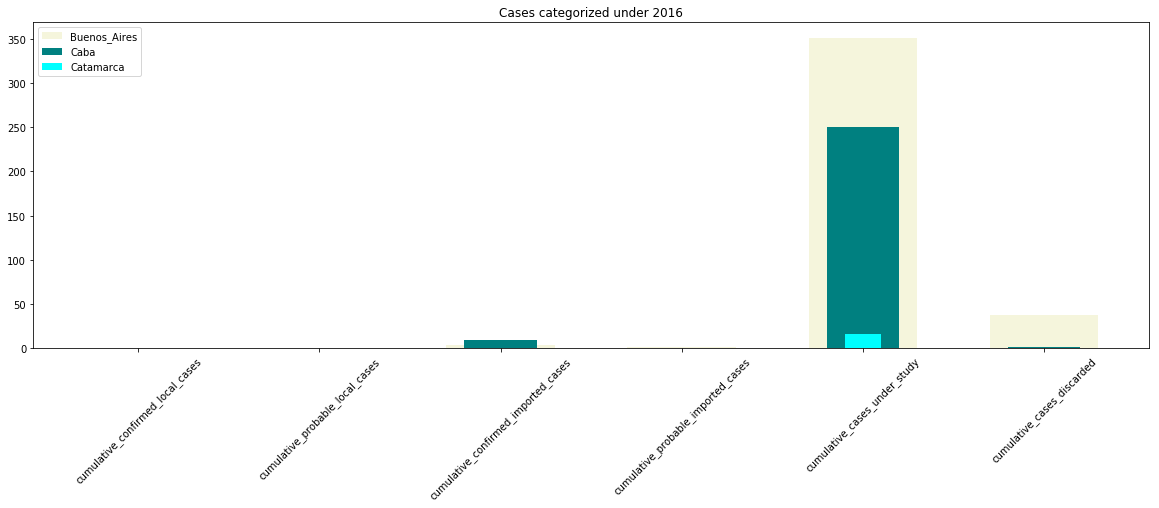

In [51]:
plt.figure(figsize=(20,6))
plt.bar(dataframe.data_field,dataframe.Buenos_Aires,width=0.6,color='beige',label="Buenos_Aires")
plt.bar(dataframe.data_field,dataframe.Caba,width=0.4,color='teal',label="Caba")
plt.bar(dataframe.data_field,dataframe.Catamarca,width=0.2,color='cyan',label="Catamarca")
plt.legend(loc=2)
plt.title("Cases categorized under 2016")
plt.xticks(rotation=45)
plt.show()
# hence Bueno_aries spotted largest number of cases under study and also discarded
# Caba has most numer of imported cases

## EXTRA VISUALIZATION ON GIVEN DATA - (monthly/yearly)

In [35]:
#creating 2 more columns out of date
data['year']=data['report_date'].dt.year
data['month']=data['report_date'].dt.month
data.year.value_counts()
# therefore : 2 years to visualize


2016    106956
2015       656
Name: year, dtype: int64

### For 'Argentina*' locations only 2016 Year data is available with data distributed within Jan(1)-July(6) months

In [36]:
### Both places only has 2016 data therefore the plot could be on months Or on count of 'value'
print(data[data.location.str.contains('Argentina')]['year'].value_counts())
print(data[data.location.str.contains('Argentina')]['month'].value_counts())

2016    2091
Name: year, dtype: int64
4    591
5    588
6    588
3    300
1     12
2     12
Name: month, dtype: int64


In [39]:
dataframe['month']=data[((data.location=="Argentina-CABA")&(data.unit=="cases"))]['month'].values

#### SHOWS THE PORTION OF CASES IN LOCATIONS UNDER EACH MONTH OF 2016

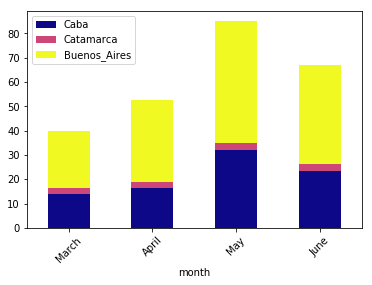

In [41]:
dataframe.groupby('month').mean().plot(kind='bar',stacked=True,colormap="plasma")
plt.xticks(np.arange(4),('March','April','May','June'),rotation=45)
plt.show()
# therfore Beuno_Aris has maximum active cases than other loations
# Month of May has maximum cases encountered

### Month of May has maximum cases encountered could also be visualized by Area plot

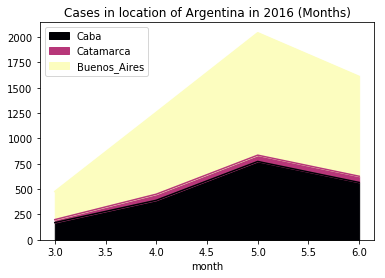

In [42]:
dataframe.groupby('month').sum().plot(kind='area',stacked=True,colormap="magma")
plt.title("Cases in location of Argentina in 2016 (Months)")
plt.show()

# 4. Build a program to predict the correct word for wrongly typed word.


In [43]:
import re

In [44]:
big = open('big.txt').read()
tokens = re.findall('\w+',big)

In [45]:
# keyboard typing mistakes same lane, adjacent
keyboard = {
    'a':['s'],
    'b':['v','n'],
    'c':['x','v'],
    'd':['s','f'],
    'e':['w','r'],
    'f':['d','g'],
    'g':['f','h'],
    'h':['g','j'],
    'i':['u','o'],
    'j':['k','h'],
    'k':['j','l'],
    'l':['k'],
    'm':['n'],
    'n':['b','m'],
    'o':['i','p'] ,
    'p':['o'],
    'q':['w'],
    'r':['e','t'],
    's':['a','d'],
    't':['r','y'],
    'u':['y','i'],
    'v':['c','b'],
    'w':['q','e'],
    'x':['z','c'],
    'y':['t','u'],
    'z':['x']   
}

In [46]:
possible=[]  # has words that are closest to error of typing
allPossiblity=[] # has all possible words
def printf(i,prob):
    res = ("".join(map(str, i))) # converting list in string
    if prob==0:
        if res not in possible:  #stop duplication by storing in list if some other regex have also got us same word
            if not possible: # to avoid 'OR' in print at beggining 
                print("'"+res+"'",end='')
            else:
                print(" OR '"+res+"'",end='') 
                
            possible.append(res)
               
    else:
        if res not in allPossiblity:
            allPossiblity.append(res)
        

In [47]:
def get_similar_word(word):

    for j in range(len(word)+1):
        
        if j==len(word):
            regexi=re.compile("^"+word[0:-1]+word[-1]+"?\w?$")  # if last word is missing/ extra
        elif j==0: 
            regexi=re.compile("^\w?"+word[0:-1]+word[-1]+"$")   # if first word is missing
        else:
            regexi=re.compile("^"+word[0:j-1]+word[j-1]+"?\w?"+word[j-1]+"?"+word[j:-1]+word[-1]+"$")
        
        newlist = list(filter(regexi.match, tokens))
        unique_data = [list(x) for x in set(tuple(x) for x in newlist)]
        for i in unique_data:
            if len(word)==len(i):   # means length is same and word is misspelled  like whst: "a" misspelled as "s"
                if i[j-1] in keyboard[word[j-1]]:
                    printf(i,0)
                else:
                    printf(i,1)        
            elif len(word) == len(i)+1 or len(word) == len(i)-1:  # some word is missing  like 'numbr': "e" is
                printf(i,0)

In [48]:
def find_word(word):
    allPossiblity.clear()
    possible.clear()
    if word in tokens:
        print("Yeah I found - "+word)
    else:
        print("\tI guess you mean - ",end='')
        get_similar_word(word)
        if allPossiblity:
            print("\n\n\tYou may wanted to say any of these ?")
            print("\t\t",end='')
            print(allPossiblity)

### Testing   ( Note: . ? - are not in words)

In [49]:
FindWord= input("Enter word: ")
find_word(FindWord)

Enter word: hol
	I guess you mean - 'howl' OR 'holt' OR 'ho' OR 'hold' OR 'hole' OR 'holy'

	You may wanted to say any of these ?
		['vol', 'Vol', 'col', 'sol', 'hon', 'hop', 'hot', 'how', 'hoy']


In [60]:
find_word("whst")

	I guess you mean - 'whist' OR 'what'

	You may wanted to say any of these ?
		['wast', 'west', 'whit']


In [61]:
find_word("introspective")

Yeah I found - introspective


In [62]:
find_word("introsective")

	I guess you mean - 'introspective'

In [76]:
find_word("mrr")

	I guess you mean - 'mr'

	You may wanted to say any of these ?
		['err', 'mrs']
